# Dynamic Pricing at Lyft Bay Wheels

*Disclaimer:* Instead of executing the project by parts (Part I, II, and III), I opted by doing a single Jupyter Notebook. The initial queries were done through the CL and are included in the section [Data Exploration](#data_exploration), whereas project questions and visualizations were done using BigQuery, and are included in the section [Project Questions](#project_questions).

## Table of Contents

- [1-Problem Statement](#problem_statement)
- [2-Dataset](#dataset)
- [3-Tools](#tools)
- [4-Data Exploration](#data_exploration)
- [5-Project Questions](#project_questions)
- [6-Summary of Findings](#summary_findings)
- [7-Recommendations](#recommendations)

<a id='problem_statement'></a>
## 1-Problem Statement

### Situation

- Lyft Bay Wheels (https://www.lyft.com/bikes/bay-wheels) is the company running Bay Area Bikeshare.
- Their objective is to increase ridership through the offering of new deals through their mobile app. 
- Currently, Lyft Bay Wheels has several deal options to customers, which include: 
  * _Single Ride_: rides start at \\$2 for the first 30 minutes, then \\$3 per additional 15 minutes; 
  * _Monthly Membership_ - unlimited number of 45-minute rides, then \\$3 per additional 15 minutes; it costs \\$15 per month;
  * _Annual Membership_ - unlimited number of 45-minute rides, then \\$3 per additional 15 minutes; it costs \\$149 per year;
  * _Access Pass_ - unlimited number of 30-minute rides on 24-hours, then \\$3 per additional 15 minutes; it costs \\$10 per day;
  * _Bike Share for All_ - subsidized offers to income-eligible customers;
  * _Corporate Membership_ - fully or partially subsidized memberships sponsored by private organizations;
  * _Riding With Others_ - special Access Pass offers for groups;
  * _Ebike Pricing_ - special pricing conditions applicable for ebikes.

### Complication

- The number of rides has been declining in the past few months compared with the same period of last year.
- It is imperative to attract new customers to the service in order to achieve a higher utilization and a better profitability.

### Objetive
- In this project, we will recommend changes to our offering portfolio in order to increase the attractiveness of our service to new customers.
- We are going to focus on a customer segment that has proved to be particularly attractive to the company: the commuter riders.
- For the scope of this project, we will focus on the deal portfolio as it were the only lever at our disposal; we will not consider other business levers at disposal of Lyft Bay Wheels management team, such as increasing the number of stations, expanding number of docks on existing stations, offering new mobility options, creating a return service, partnering with other parking spaces, etc.

### Key questions
- To accomplish with the project's objectives, these are the most critical questions we need to answer: 

    * How fast have we been able to grow the overall number of trips in the system?
    * Which hours of the day concentrate the most number of trips ('commuter hours')?
    * What is the mix of subscribers vs. regular customers during the commuter hours? How does it compare to the mix during other periods of the day?
    * What is the average trip duration during commuter hours? How does it compare with the trip duration in other periods of the day? 
    * What are the 5 most popular trips that we would call "commuter trips" in the morning?
    * What are the 5 most popular trips that we would call "commuter trips" in the evening?
    * Which stations are the most demanded ones as origin points during commuter hours?
    * Where does our most demanded origin stations are located?
    * How is the availability of bikes in the most demanded origin stations during commuter hours? Do we have spare capacity to offer to new users?
    * Which stations are the most demanded ones as destination points during commuter hours?
    * Where does our most demanded destination stations are located?
    * How is the availability of dockers in the most demanded destination stations during commuter hours? Do we have spare parking capacity to offer to new users?
    * What are our recommendations for new offers (justified based on our findings)?

<a id='dataset'></a>
## 2-Dataset

- For this project, we will use a Big Query Public Dataset, offered by Google Cloud Platform (GCP).
- The dataset covers an aproximate period of 3 years of bike trips in the Bay Area.
- It has two datasets: a static one and a dynamic one. We will use the static one, called **san_francisco**.
- From the **san_francisco** dataset, we will use the following tables:
    * bikeshare_stations
    * bikeshare_status
    * bikeshare_trips

<a id='tools'></a>
## 3-Tools

- This project will be done entirely on Google Cloud Platform (GCP).
- This project will make use of the following tools:
    * Our virtual machine on GCP
    * Jupyter Notebook
    * Google's BigQuery
    * Linux Command Line
    * Python 3
    * Numpy
    * Pandas
    * Geopandas
    * Matplotlib

<a id='data_exploration'></a>
## 4-Data Exploration

- In this section we will perform some initial data exploration using Google's BigQuery from the CLI.
- We will follow a structure where we first present the question, then the answer we got, and finally the query we used with the results in a table format.
- For this initial data exploration, we will not make use of visualizations other than tables.

### What's the size of this dataset? (i.e., how many trips)

This dataset contains 983,648 trips as can be viewed on the result table of the query below.

In [962]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(DISTINCT trip_id) AS num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r27c3f7b531fbdcda_00000174cab2a12a_1 ... (1s) Current status: DONE   
+-----------+
| num_trips |
+-----------+
|    983648 |
+-----------+


### Is there duplicated trip_ids on the dataset?

No, as the COUNT of trip_id field returned the same result as the COUNT of DISTINCT trip_id.

In [963]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(trip_id) AS num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r6e3245dbfc357240_00000174cab2ec11_1 ... (0s) Current status: DONE   
+-----------+
| num_trips |
+-----------+
|    983648 |
+-----------+


### What is the earliest start date and time and latest end date and time for a trip?

The earliest start date and time covered by this dataset is 2013-08-29 at 09:08 am, while the latest end date and time is 2016-08-31 at 11:48 pm.

In [964]:
! bq query --use_legacy_sql=FALSE 'SELECT MIN(start_date) AS earliest_start_date, MAX(end_date) AS latest_end_date FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r333415a6889d6aa5_00000174cab32988_1 ... (0s) Current status: DONE   
+---------------------+---------------------+
| earliest_start_date |   latest_end_date   |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+


### How many bikes are there?

There are a total of 700 distinct bikes in our dataset.

In [965]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(DISTINCT bike_number) AS num_bikes FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r2265b1a8bc6a9c40_00000174cab34296_1 ... (0s) Current status: DONE   
+-----------+
| num_bikes |
+-----------+
|       700 |
+-----------+


### How many trips are in the morning vs. in the afternoon?

There are 412,339 trips in the morning (from midnight to noon), and 571,309 in the afternoon (from noon to midnight).

In [966]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(trip_id) AS morning_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) < 12'

Waiting on bqjob_r6cb34f1dc441e45_00000174cab3600a_1 ... (0s) Current status: DONE   
+---------------+
| morning_trips |
+---------------+
|        412339 |
+---------------+


In [967]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(trip_id) AS afternoon_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) >= 12'

Waiting on bqjob_r5bd9044e938391aa_00000174cab378fb_1 ... (0s) Current status: DONE   
+-----------------+
| afternoon_trips |
+-----------------+
|          571309 |
+-----------------+


### Which hours of the day concentrate most of the trips?

The hours of the day that concentrates most of the trips are from 7am to 10am in the morning, and from 4pm to 7pm in the afternoon.

In [968]:
! bq query --use_legacy_sql=FALSE 'SELECT EXTRACT(HOUR FROM start_date) AS start_hour, COUNT(trip_id) AS num_trips, ROUND(COUNT(trip_id)/(SELECT COUNT(trip_id) FROM `bigquery-public-data.san_francisco.bikeshare_trips`)*100, 2) AS pct_total FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_hour ORDER BY start_hour'

Waiting on bqjob_r3da56fcd607ec66f_00000174cab39321_1 ... (0s) Current status: DONE   
+------------+-----------+-----------+
| start_hour | num_trips | pct_total |
+------------+-----------+-----------+
|          0 |      2929 |       0.3 |
|          1 |      1611 |      0.16 |
|          2 |       877 |      0.09 |
|          3 |       605 |      0.06 |
|          4 |      1398 |      0.14 |
|          5 |      5098 |      0.52 |
|          6 |     20519 |      2.09 |
|          7 |     67531 |      6.87 |
|          8 |    132464 |     13.47 |
|          9 |     96118 |      9.77 |
|         10 |     42782 |      4.35 |
|         11 |     40407 |      4.11 |
|         12 |     46950 |      4.77 |
|         13 |     43714 |      4.44 |
|         14 |     37852 |      3.85 |
|         15 |     47626 |      4.84 |
|         16 |     88755 |      9.02 |
|         17 |    126302 |     12.84 |
|         18 |     84569 |       8.6 |
|         19 |     41071 |      4.18 |
|         20 |  

### How is the distribution of the duration of trips in minutes intervals?

Most trips are actually short, during less than 15 minutes. The fastest trips in the database took just one minute, while the longest one took 287,840 minutes!

In [970]:
! bq query --use_legacy_sql=FALSE 'SELECT ROUND(duration_sec/60, 0) AS minutes, COUNT(trip_id) AS num_trips, ROUND(COUNT(trip_id)/(SELECT COUNT(trip_id) FROM `bigquery-public-data.san_francisco.bikeshare_trips`)*100, 2) AS pct_total FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY minutes ORDER BY minutes LIMIT 30'

Waiting on bqjob_r6cc503ec1970486b_00000174cab43824_1 ... (0s) Current status: DONE   
+---------+-----------+-----------+
| minutes | num_trips | pct_total |
+---------+-----------+-----------+
|     1.0 |      2355 |      0.24 |
|     2.0 |     14722 |       1.5 |
|     3.0 |     44361 |      4.51 |
|     4.0 |     76418 |      7.77 |
|     5.0 |     82518 |      8.39 |
|     6.0 |     87353 |      8.88 |
|     7.0 |     87847 |      8.93 |
|     8.0 |     85073 |      8.65 |
|     9.0 |     78198 |      7.95 |
|    10.0 |     69599 |      7.08 |
|    11.0 |     60162 |      6.12 |
|    12.0 |     49975 |      5.08 |
|    13.0 |     40566 |      4.12 |
|    14.0 |     32686 |      3.32 |
|    15.0 |     26059 |      2.65 |
|    16.0 |     20149 |      2.05 |
|    17.0 |     15322 |      1.56 |
|    18.0 |     11603 |      1.18 |
|    19.0 |      9154 |      0.93 |
|    20.0 |      7193 |      0.73 |
|    21.0 |      6053 |      0.62 |
|    22.0 |      5202 |      0.53 |
|    23.0 |  

In [971]:
! bq query --use_legacy_sql=FALSE 'SELECT ROUND(duration_sec/60, 0) AS minutes, COUNT(trip_id) AS num_trips, ROUND(COUNT(trip_id)/(SELECT COUNT(trip_id) FROM `bigquery-public-data.san_francisco.bikeshare_trips`)*100, 2) AS pct_total FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY minutes ORDER BY minutes DESC LIMIT 10'

Waiting on bqjob_r48201ab774080d1c_00000174cab451be_1 ... (0s) Current status: DONE   
+----------+-----------+-----------+
| minutes  | num_trips | pct_total |
+----------+-----------+-----------+
| 287840.0 |         1 |       0.0 |
|  35617.0 |         1 |       0.0 |
|  30877.0 |         1 |       0.0 |
|  18892.0 |         1 |       0.0 |
|  12037.0 |         1 |       0.0 |
|  12008.0 |         1 |       0.0 |
|  11941.0 |         1 |       0.0 |
|  11922.0 |         1 |       0.0 |
|  11482.0 |         1 |       0.0 |
|  10932.0 |         1 |       0.0 |
+----------+-----------+-----------+


### Which stations concentrate most of the trips?

Stations 70, 69, 50, 60, 61, 55, 74, 77, 65, 67, and 76 concentrate most of the trips, either as origin or destination stations.

In [972]:
! bq query --use_legacy_sql=FALSE 'SELECT MAX(start_station_id) AS start_id, MAX(start_station_name) AS start_name, COUNT(trip_id) AS num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_id ORDER BY num_trips DESC LIMIT 10'

Waiting on bqjob_r58d1fa5adaf03a90_00000174cab49d91_1 ... (0s) Current status: DONE   
+----------+-----------------------------------------------+-----------+
| start_id |                  start_name                   | num_trips |
+----------+-----------------------------------------------+-----------+
|       70 | San Francisco Caltrain (Townsend at 4th)      |     72683 |
|       69 | San Francisco Caltrain 2 (330 Townsend)       |     56100 |
|       50 | Harry Bridges Plaza (Ferry Building)          |     49062 |
|       60 | Embarcadero at Sansome                        |     41137 |
|       61 | 2nd at Townsend                               |     39936 |
|       55 | Temporary Transbay Terminal (Howard at Beale) |     39200 |
|       74 | Steuart at Market                             |     38531 |
|       77 | Market at Sansome                             |     35142 |
|       65 | Townsend at 7th                               |     34894 |
|       67 | Market at 10th          

In [973]:
! bq query --use_legacy_sql=FALSE 'SELECT MAX(end_station_id) AS end_id, MAX(end_station_name) AS end_name, COUNT(trip_id) AS num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY end_station_id ORDER BY num_trips DESC LIMIT 10'

Waiting on bqjob_r3414ffd44d5f8957_00000174cab4b495_1 ... (0s) Current status: DONE   
+--------+-----------------------------------------------+-----------+
| end_id |                   end_name                    | num_trips |
+--------+-----------------------------------------------+-----------+
|     70 | San Francisco Caltrain (Townsend at 4th)      |     92014 |
|     69 | San Francisco Caltrain 2 (330 Townsend)       |     58713 |
|     50 | Harry Bridges Plaza (Ferry Building)          |     50185 |
|     60 | Embarcadero at Sansome                        |     46197 |
|     61 | 2nd at Townsend                               |     44145 |
|     77 | Market at Sansome                             |     40956 |
|     74 | Steuart at Market                             |     39598 |
|     65 | Townsend at 7th                               |     38545 |
|     55 | Temporary Transbay Terminal (Howard at Beale) |     35477 |
|     76 | Market at 4th                                 |   

### What is the share of trips done by regular customers vs. subscribers?

The majority of trips are done by subscribers.

In [974]:
! bq query --use_legacy_sql=FALSE 'SELECT subscriber_type, COUNT(trip_id) AS num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type'

Waiting on bqjob_r1d75dd077abaa42d_00000174cab4d46e_1 ... (0s) Current status: DONE   
+-----------------+-----------+
| subscriber_type | num_trips |
+-----------------+-----------+
| Customer        |    136809 |
| Subscriber      |    846839 |
+-----------------+-----------+


### How many stations are there in the system?

There are 74 stations in the system.

In [975]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(DISTINCT station_id) AS num_stations FROM `bigquery-public-data.san_francisco.bikeshare_stations`'

Waiting on bqjob_r70e20b82adc5fb72_00000174cab4e9fe_1 ... (0s) Current status: DONE   
+--------------+
| num_stations |
+--------------+
|           74 |
+--------------+


### Is there duplicated station_ids on the dataset?

No, as the COUNT of station_id field returned the same result as the COUNT of DISTINCT station_id.

In [976]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(station_id) AS num_stations FROM `bigquery-public-data.san_francisco.bikeshare_stations`'

Waiting on bqjob_r3183ab4f1c8234b6_00000174cab4fed1_1 ... (0s) Current status: DONE   
+--------------+
| num_stations |
+--------------+
|           74 |
+--------------+


### When does the oldest station was opened and when does the newest station was opened?

The oldest station was opened in 08/05/2013, while the newest station was opened in 08/04/2016.

In [977]:
! bq query --use_legacy_sql=FALSE 'SELECT MIN(installation_date) AS oldest_station, MAX(installation_date) AS newest_station FROM `bigquery-public-data.san_francisco.bikeshare_stations`'

Waiting on bqjob_r68d66f3f4f6b42ba_00000174cab51b19_1 ... (0s) Current status: DONE   
+----------------+----------------+
| oldest_station | newest_station |
+----------------+----------------+
|     2013-08-05 |     2016-08-04 |
+----------------+----------------+


### What are the largest and the smallest stations in the system?

The largest stations are 90 and 91 with more than 30 docks each. The smallest stations are 4, 32, 35, and 37 with only 11 docks each.

In [978]:
! bq query --use_legacy_sql=FALSE 'SELECT station_id, name, dockcount FROM `bigquery-public-data.san_francisco.bikeshare_stations` ORDER BY dockcount DESC'

Waiting on bqjob_r6746781ff04d994c_00000174cab53631_1 ... (0s) Current status: DONE   
+------------+-----------------------------------------------+-----------+
| station_id |                     name                      | dockcount |
+------------+-----------------------------------------------+-----------+
|         91 | Cyril Magnin St at Ellis St                   |        35 |
|         90 | 5th St at Folsom St                           |        31 |
|          2 | San Jose Diridon Caltrain Station             |        27 |
|         61 | 2nd at Townsend                               |        27 |
|         67 | Market at 10th                                |        27 |
|         77 | Market at Sansome                             |        27 |
|         22 | Redwood City Caltrain Station                 |        25 |
|         34 | Palo Alto Caltrain Station                    |        23 |
|         29 | San Antonio Caltrain Station                  |        23 |
|         28 

### How many stations are there by city?

San Francisco concentrates most of the stations with a total of 37, followed by San Jose with a total of 18.

In [979]:
! bq query --use_legacy_sql=FALSE 'SELECT landmark, COUNT(station_id) as num_stations FROM `bigquery-public-data.san_francisco.bikeshare_stations` GROUP BY landmark ORDER BY num_stations DESC'

Waiting on bqjob_r6df12e4be560f136_00000174cab567ab_1 ... (0s) Current status: DONE   
+---------------+--------------+
|   landmark    | num_stations |
+---------------+--------------+
| San Francisco |           37 |
| San Jose      |           18 |
| Mountain View |            7 |
| Redwood City  |            7 |
| Palo Alto     |            5 |
+---------------+--------------+


### What was the earliest and latest status change computed on a station?

The earliest status change was computed on 08/29/2013 at 12h06pm, while the latest status change was computed on 08/31/2016 on 11h58pm.

In [980]:
! bq query --use_legacy_sql=FALSE 'SELECT MIN(time) AS min_stauts_change, MAX(time) AS max_status_change FROM `bigquery-public-data.san_francisco.bikeshare_status`'

Waiting on bqjob_r2ff42eb4ef777574_00000174cab58060_1 ... (2s) Current status: DONE   
+---------------------+---------------------+
|  min_stauts_change  |  max_status_change  |
+---------------------+---------------------+
| 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
+---------------------+---------------------+


### How many snapshots of availability does each station in the system received over time?

The vast majority of stations have a pretty abundant profile of availability snapshots, ranging over all the period of the dataset, except for stations 88, 89, 90 and 91 which have data available only for a week in August, 2016, and station 87 which have data available only for few hours in 2016/07/18.

In [981]:
! bq query --use_legacy_sql=FALSE 'SELECT MAX(station_id) AS station, COUNT(time) AS num_snapshots, MIN(time) AS first_snapshot, MAX(time) AS last_snapthost FROM `bigquery-public-data.san_francisco.bikeshare_status` GROUP BY station_id ORDER BY num_snapshots DESC'

Waiting on bqjob_r7608487198c0e8bf_00000174cab5c49a_1 ... (2s) Current status: DONE   
+---------+---------------+---------------------+---------------------+
| station | num_snapshots |   first_snapshot    |   last_snapthost    |
+---------+---------------+---------------------+---------------------+
|       5 |       1559598 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|       6 |       1559598 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|       7 |       1559598 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|       9 |       1559597 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|      10 |       1559597 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|      11 |       1559597 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|      12 |       1559597 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|      13 |       1559597 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|      16 |       1559597 | 2013-08-29 12:06:01 | 2016-08-31 23:58:59 |
|      27 |       1559597 | 2013-08-29 12:06:01 |

### Are stations 87, 88, 89, 90 and 91 the newest ones to be installed in the system, which could explain the lower data availability?  

In fact, stations 88, 89, 90 and 91 are amonst the newest in the system, which explains the lower availability of status data. Station 87 does not appear on the stations table and so will be ignored on the subsequent analyses.

In [982]:
! bq query --use_legacy_sql=FALSE 'SELECT station_id, installation_date FROM `bigquery-public-data.san_francisco.bikeshare_stations` WHERE station_id IN (87, 88, 89, 90, 91) ORDER BY installation_date DESC'

Waiting on bqjob_r1fb41f83ed969754_00000174cab6126f_1 ... (0s) Current status: DONE   
+------------+-------------------+
| station_id | installation_date |
+------------+-------------------+
|         90 |        2016-08-04 |
|         91 |        2016-08-04 |
|         89 |        2016-06-05 |
|         88 |        2016-06-05 |
+------------+-------------------+


### How many snapshots of availability does a given station (eg. station 28) received during a single day (eg. 2015/03/28) by hour?

It received 60 snapshots of availability, suggesting 1 minute intervals between snapshots.

In [983]:
! bq query --use_legacy_sql=FALSE 'SELECT EXTRACT(HOUR FROM time) AS hour, COUNT(time) AS num_snapshots FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE station_id = 28 AND EXTRACT(YEAR FROM time) = 2015 AND EXTRACT(MONTH FROM time) = 03 AND EXTRACT(DAY FROM time) = 28 GROUP BY hour ORDER BY hour'

Waiting on bqjob_r4a15c9233b4cf1c0_00000174cab6296b_1 ... (0s) Current status: DONE   
+------+---------------+
| hour | num_snapshots |
+------+---------------+
|    0 |            60 |
|    1 |            60 |
|    2 |            60 |
|    3 |            60 |
|    4 |            60 |
|    5 |            60 |
|    6 |            60 |
|    7 |            60 |
|    8 |            60 |
|    9 |            60 |
|   10 |            60 |
|   11 |            60 |
|   12 |            60 |
|   13 |            60 |
|   14 |            60 |
|   15 |            60 |
|   16 |            60 |
|   17 |            60 |
|   18 |            60 |
|   19 |            60 |
|   20 |            60 |
|   21 |            60 |
|   22 |            60 |
|   23 |            60 |
+------+---------------+


### How does the bike availability fluctuates over the day in station 28?

At station 28, bike availability peaks at ~56% during 8am, and drops to a minimum of ~43% at 11am.

In [984]:
! bq query --use_legacy_sql=FALSE 'SELECT EXTRACT(HOUR FROM time) AS hour, ROUND(AVG(bikes_available), 1) AS avg_bikes_available, ROUND(AVG(bikes_available + docks_available), 0) AS dock_capacity, ROUND(SUM(bikes_available)/SUM(bikes_available + docks_available)*100,2) AS availability FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE station_id = 28 GROUP BY hour ORDER BY hour'

Waiting on bqjob_r22250db91cda9668_00000174cab646a4_1 ... (0s) Current status: DONE   
+------+---------------------+---------------+--------------+
| hour | avg_bikes_available | dock_capacity | availability |
+------+---------------------+---------------+--------------+
|    0 |                12.2 |          23.0 |        52.89 |
|    1 |                12.1 |          23.0 |        52.79 |
|    2 |                12.1 |          23.0 |         52.7 |
|    3 |                12.1 |          23.0 |        52.68 |
|    4 |                12.1 |          23.0 |        52.58 |
|    5 |                12.1 |          23.0 |        52.64 |
|    6 |                12.2 |          23.0 |        53.23 |
|    7 |                12.6 |          23.0 |        54.72 |
|    8 |                12.8 |          23.0 |        55.71 |
|    9 |                11.2 |          23.0 |        48.85 |
|   10 |                10.0 |          23.0 |         43.5 |
|   11 |                 9.9 |          23.0 

### How did the overall bike availability fluctuate over time? 

Bike availability fluctuated on the overall system from a minimum of 32% to a maximum of 48%. In general it is quite stable, with a light upward trend in the last few months.

In [985]:
! bq query --use_legacy_sql=FALSE 'SELECT EXTRACT(YEAR FROM time) AS year, EXTRACT(MONTH FROM time) AS month, ROUND(AVG(bikes_available)/(AVG(docks_available) + AVG(bikes_available))*100, 2) AS bike_availability FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE station_id = 56 GROUP BY year, month ORDER BY year, month'

Waiting on bqjob_r5e372d2a8a62885e_00000174cab6667c_1 ... (0s) Current status: DONE   
+------+-------+-------------------+
| year | month | bike_availability |
+------+-------+-------------------+
| 2013 |     8 |             37.18 |
| 2013 |     9 |             39.01 |
| 2013 |    10 |             36.03 |
| 2013 |    11 |              41.2 |
| 2013 |    12 |             43.44 |
| 2014 |     1 |             42.31 |
| 2014 |     2 |             40.02 |
| 2014 |     3 |             35.81 |
| 2014 |     4 |             37.55 |
| 2014 |     5 |              32.0 |
| 2014 |     6 |             35.22 |
| 2014 |     7 |             34.86 |
| 2014 |     8 |             42.22 |
| 2014 |     9 |             39.56 |
| 2014 |    10 |             45.56 |
| 2014 |    11 |             46.14 |
| 2014 |    12 |             47.58 |
| 2015 |     1 |             44.15 |
| 2015 |     2 |             38.57 |
| 2015 |     3 |             47.96 |
| 2015 |     4 |             37.69 |
| 2015 |     5 |         

<a id='project_questions'></a>
## 5-Project Questions

- In this section, we will perform the queries and visualizations that answers our Project Questions (posed on [Problem Statement](#problem_statement)).
- We will follow a structure where we first state the question, then the answer, then the query we used, and finally the results we got in a table or plot format.
- The findings of this section are the ones that will support our [Recommendations](#recommendations).
- We will start this section performing the imports we will need ahead.

In [986]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

### How fast have we been able to grow the overall number of trips in the system?

For the past 12 months, we have not been able to grow our number of rides on a YoY basis. This indicates the opportunity to tweak our offering in order to attract more regular riders to our service. An attractive segment to go after are riders that use our service to commute on a daily basis from home to work, and vice versa. We will focus our study in understanding how to improve our offering to this valuable segment of riders.

In [987]:
%%bigquery num_trips_trend

SELECT EXTRACT(YEAR FROM start_date) AS year, EXTRACT(MONTH FROM start_date) AS month, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE start_date >= '2013-09-01'
GROUP BY year, month
ORDER BY year, month

In [988]:
num_trips_trend["date"] = num_trips_trend["year"].astype(str) + '/' + num_trips_trend["month"].astype(str)
num_trips_trend["date"] = pd.to_datetime(num_trips_trend["date"])
num_trips_trend.drop(columns=["year", "month"], inplace=True)
num_trips_trend.set_index("date", inplace=True)
num_trips_trend["yoy_change"] = 100*num_trips_trend.pct_change(12)

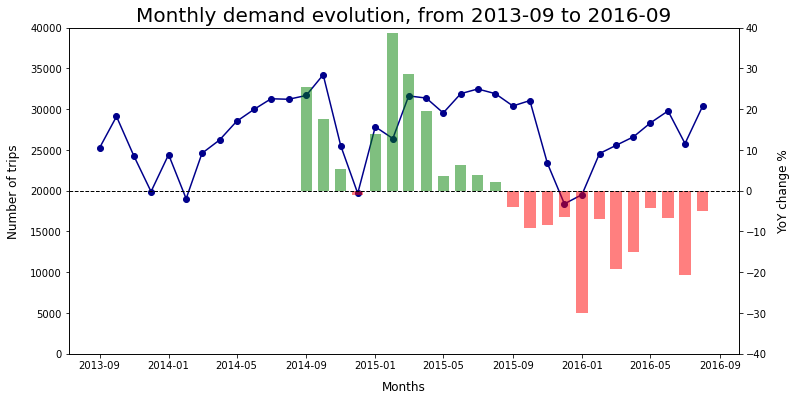

In [989]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Monthly demand evolution, from 2013-09 to 2016-09", fontsize=20)
ax1.plot(num_trips_trend.index, num_trips_trend["num_trips"], color="darkblue", marker="o")
ax1.set_xlabel("Months", fontsize=12, labelpad=10)
ax1.set_ylabel("Number of trips", fontsize=12, labelpad=10)
plt.ylim(0, 40000)
ax2 = ax1.twinx()
ax2.bar(num_trips_trend.index, num_trips_trend["yoy_change"], width=20, color=(num_trips_trend["yoy_change"] > 0).map({True: 'g', False: 'r'}), alpha=0.5)
ax2.set_ylabel("YoY change %", fontsize=12, labelpad=10)
plt.ylim(-40, 40)
plt.axhline(linewidth=1, linestyle="dashed", color="k")
plt.show()

### Which hours of the day concentrate the most number of trips ('commuter hours')?

The hours of the day with the largest number of trips ('commuter hours') range from 7am to 10am in the morning, and from 4pm to 7pm in the evening. These hours are very popular hours to use our services, and are a valuable period of the day to strenght our offering.

In [990]:
%%bigquery trips_per_hour

SELECT EXTRACT(HOUR FROM start_date) AS start_hour, COUNT(trip_id) AS num_trips, ROUND(COUNT(trip_id)/(SELECT COUNT(trip_id) FROM `bigquery-public-data.san_francisco.bikeshare_trips`)*100, 2) AS pct_total
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY start_hour
ORDER BY start_hour

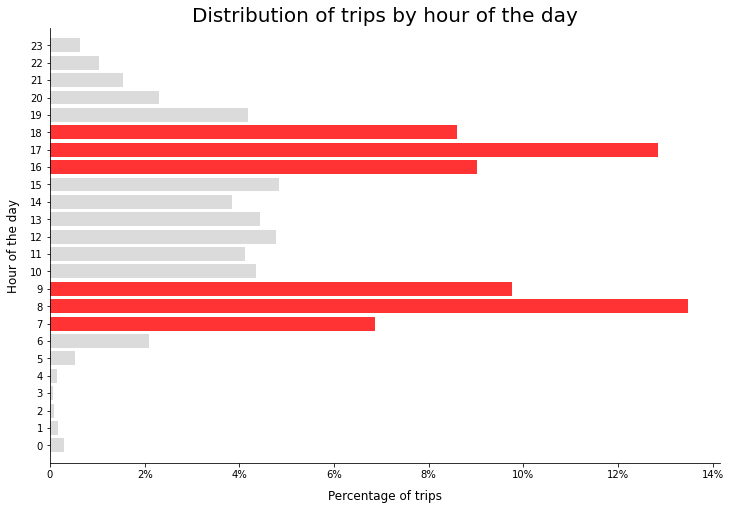

In [991]:
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(y=trips_per_hour["start_hour"], width=trips_per_hour["pct_total"], color=(trips_per_hour["pct_total"] > 5).map({True: "red", False: "lightgrey"}), alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Percentage of trips", fontsize=12, labelpad=10)
ax.set_ylabel("Hour of the day", fontsize=12, labelpad=10)
ax.set_title("Distribution of trips by hour of the day", fontdict={'fontsize':20})
plt.ylim(-1, 24)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.xticks([0,2,4,6,8,10,12,14], labels=[0,"2%","4%","6%","8%","10%","12%","14%"])
plt.show()

### What is the mix of subscribers vs. regular customers during the commuter hours? How does it compare to the mix during other periods of the day? 

Subscribers make 92% of the trips during the commuter hours, compared with 77% of the trips in other periods of the day. This indicates that commuter hours are an excelent timing window to acquire loyal customers.

In [992]:
%%bigquery mix_commuter_hours

SELECT subscriber_type, COUNT(trip_id) AS num_trips, ROUND(COUNT(trip_id)/
                                                           (SELECT COUNT(trip_id)
                                                            FROM `bigquery-public-data.san_francisco.bikeshare_trips`
                                                            WHERE EXTRACT(HOUR FROM start_date) IN (7, 8, 9, 16, 17, 18))*100, 2)
                                                            AS pct_total
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (7, 8, 9, 16, 17, 18)
GROUP BY subscriber_type

In [993]:
mix_commuter_hours.set_index("subscriber_type", inplace=True)

In [994]:
%%bigquery mix_other_hours

SELECT subscriber_type, COUNT(trip_id) AS num_trips, ROUND(COUNT(trip_id)/
                                                           (SELECT COUNT(trip_id)
                                                            FROM `bigquery-public-data.san_francisco.bikeshare_trips`
                                                            WHERE EXTRACT(HOUR FROM start_date) NOT IN (7, 8, 9, 16, 17, 18))*100, 2)
                                                            AS pct_total
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) NOT IN (7, 8, 9, 16, 17, 18)
GROUP BY subscriber_type

In [995]:
mix_other_hours.set_index("subscriber_type", inplace=True)

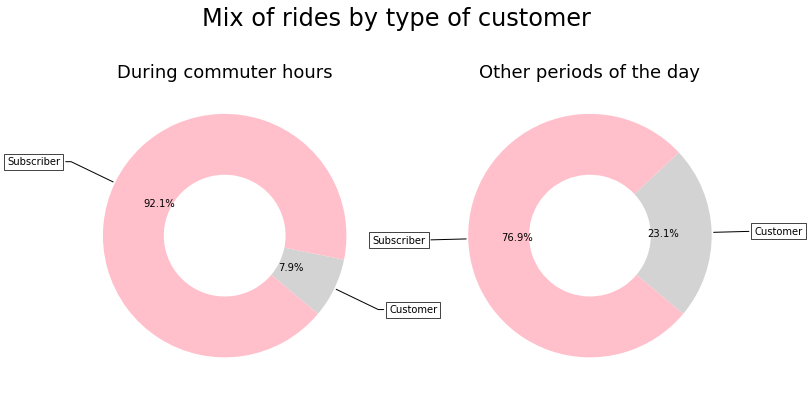

In [1003]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), subplot_kw=dict(aspect="equal"))

labels_ax1 = mix_commuter_hours.index
data_ax1 = mix_commuter_hours["num_trips"]

labels_ax2 = mix_other_hours.index
data_ax2 = mix_other_hours["num_trips"]

wedges_ax1, _,_ = ax1.pie(data_ax1, wedgeprops=dict(width=0.5), startangle=-40, colors=("lightgray", "pink"), autopct="%.1f%%")
wedges_ax2, _,_ = ax2.pie(data_ax2, wedgeprops=dict(width=0.5), startangle=-40, colors=("lightgray", "pink"), autopct="%.1f%%")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges_ax1):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(labels_ax1[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

for i, p in enumerate(wedges_ax2):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax2.annotate(labels_ax2[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)    

fig.suptitle("Mix of rides by type of customer", fontsize=24, y=0.9)    
    
ax1.set_title("During commuter hours", fontsize=18)
ax2.set_title("Other periods of the day", fontsize=18)

plt.show()

### What is the average trip duration during commuter hours? How does it compare with the trip duration in other periods of the day? 

Commuter hours trips are almost two times shorter than in other periods of the day. This allows a higher rotation of our bikes, which is a very good thing to the business.

In [1004]:
%%bigquery trip_duration

SELECT (SELECT ROUND(AVG(duration_sec)/60, 1)
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (7, 8, 9, 16, 17, 18))
AS commuter_hours_duration,
(SELECT ROUND(AVG(duration_sec)/60, 1)
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) NOT IN (7, 8, 9, 16, 17, 18))
AS other_hours_duration
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY commuter_hours_duration, other_hours_duration

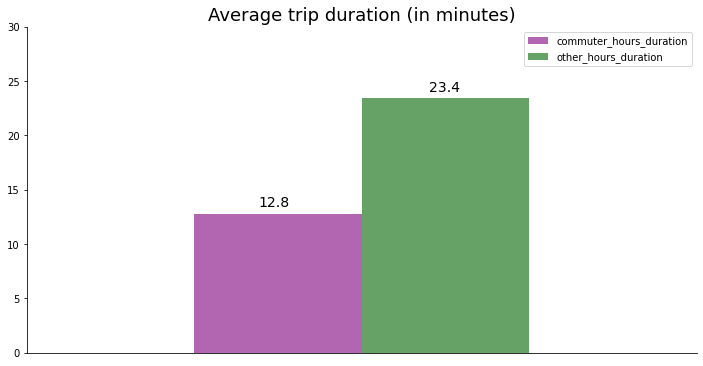

In [1005]:
ax = trip_duration.plot(kind="bar", figsize=(12,6), color=("purple", "darkgreen"), alpha=0.6)
plt.title("Average trip duration (in minutes)", fontsize=18)
plt.ylim(0, 30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.xaxis.set_visible(False)
plt.annotate("12.8", (-0.155, 13.5), fontsize=14)
plt.annotate("23.4", (0.1, 24), fontsize=14)
plt.show()

### What are the 5 most popular trips that we would call "commuter trips" in the morning?

The origin-destination station pairs presented in the table below are the most demanded ones during the morning commuter hours, from 7am to 10am.

In [1006]:
%%bigquery comm_trips_morning

SELECT MAX(start_station_id) AS origin_id, MAX(start_station_name) AS origin_name, MAX(end_station_id) AS dest_id, MAX(end_station_name) AS dest_name, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (7, 8, 9)
GROUP BY start_station_id, end_station_id
ORDER BY num_trips
DESC LIMIT 5

In [1007]:
comm_trips_morning.set_index("origin_id", inplace=True)

In [1008]:
comm_trips_morning

,origin_name,dest_id,dest_name,num_trips
origin_id,,,,
50,Harry Bridges Plaza (Ferry Building),61,2nd at Townsend,4554
74,Steuart at Market,61,2nd at Townsend,3780
69,San Francisco Caltrain 2 (330 Townsend),65,Townsend at 7th,3540
70,San Francisco Caltrain (Townsend at 4th),51,Embarcadero at Folsom,3371
70,San Francisco Caltrain (Townsend at 4th),55,Temporary Transbay Terminal (Howard at Beale),3133


### What are the 5 most popular trips that we would call "commuter trips" in the evening?

The origin-destination station pairs presented in the table below are the most demanded ones during the evening commuter hours, from 4pm to 7pm.

In [1009]:
%%bigquery comm_trips_afternoon

SELECT MAX(start_station_id) AS origin_id, MAX(start_station_name) AS origin_name, MAX(end_station_id) AS dest_id, MAX(end_station_name) AS dest_name, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (16, 17, 18)
GROUP BY start_station_id, end_station_id
ORDER BY num_trips
DESC LIMIT 5

In [1010]:
comm_trips_afternoon.set_index("origin_id", inplace=True)

In [1011]:
comm_trips_afternoon

,origin_name,dest_id,dest_name,num_trips
origin_id,,,,
61,2nd at Townsend,50,Harry Bridges Plaza (Ferry Building),4303
51,Embarcadero at Folsom,70,San Francisco Caltrain (Townsend at 4th),4065
60,Embarcadero at Sansome,74,Steuart at Market,4023
74,Steuart at Market,70,San Francisco Caltrain (Townsend at 4th),3437
55,Temporary Transbay Terminal (Howard at Beale),70,San Francisco Caltrain (Townsend at 4th),3335


### Which stations are the most demanded ones as origin points during commuter hours?

The bar plots below present the 10 most demanded origin stations during the commuter hours. These are the most popular origin points in our system. We can see that overall the volume of trips is much more concentrated in some stations during the morning than during evening.

In [1012]:
%%bigquery most_demanded_stations_morning
SELECT MAX(start_station_id) AS origin_id, MAX(start_station_name) AS origin_name, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (7, 8, 9)
GROUP BY start_station_id
ORDER BY num_trips DESC
LIMIT 10

In [1013]:
%%bigquery most_demanded_stations_afternoon
SELECT MAX(start_station_id) AS origin_id, MAX(start_station_name) AS origin_name, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (16, 17, 18)
GROUP BY start_station_id
ORDER BY num_trips DESC
LIMIT 10

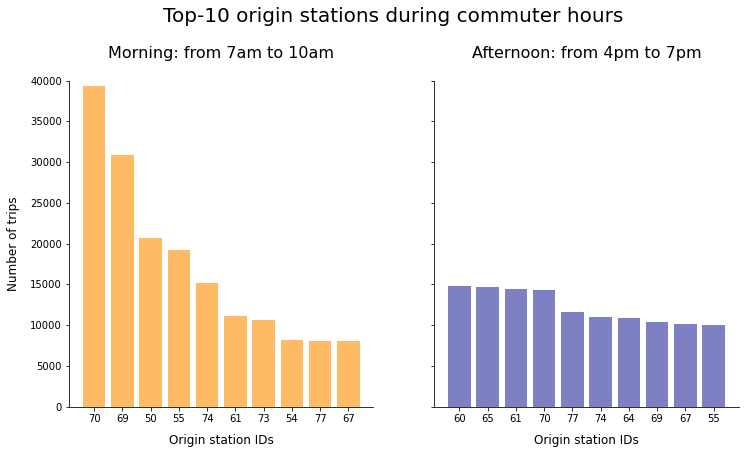

In [1014]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
fig.suptitle("Top-10 origin stations during commuter hours", fontsize=20, y=1.05)
ax1.bar(x=most_demanded_stations_morning["origin_id"].astype(str), height=most_demanded_stations_morning["num_trips"], color="darkorange", alpha=0.6)
ax2.bar(x=most_demanded_stations_afternoon["origin_id"].astype(str), height=most_demanded_stations_afternoon["num_trips"], color="darkblue", alpha=0.5)
ax1.set_title("Morning: from 7am to 10am", fontdict={'fontsize':16}, y=1.05)
ax2.set_title("Afternoon: from 4pm to 7pm", fontdict={'fontsize':16}, y=1.05)
ax1.set_ylabel("Number of trips", fontsize=12, labelpad=10)
ax1.set_xlabel("Origin station IDs", fontsize=12, labelpad=10)
ax2.set_xlabel("Origin station IDs", fontsize=12, labelpad=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.ylim(0, 40000)
plt.show()

### Where does our most demanded origin stations are located?

The maps below show the locations of our most demanded origin point stations during commuter hours.

In [1015]:
%%bigquery morning_stations
SELECT trips.start_station_id AS station_id, MAX(stations.latitude) AS lat, MAX(stations.longitude) AS long, COUNT(trips.trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_stations` AS stations
INNER JOIN `bigquery-public-data.san_francisco.bikeshare_trips` AS trips ON stations.station_id=trips.start_station_id
WHERE trips.start_station_id in (70, 69, 50, 55, 74, 61, 73, 54, 77, 67) AND EXTRACT(HOUR FROM trips.start_date) IN (7, 8, 9)
GROUP BY trips.start_station_id
ORDER BY num_trips DESC
LIMIT 10

In [1016]:
%%bigquery evening_stations
SELECT trips.start_station_id AS station_id, MAX(stations.latitude) AS lat, MAX(stations.longitude) AS long, COUNT(trips.trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_stations` AS stations
INNER JOIN `bigquery-public-data.san_francisco.bikeshare_trips` AS trips ON stations.station_id=trips.start_station_id
WHERE trips.start_station_id in (60, 65, 61, 70, 77, 74, 64, 69, 67, 55) AND EXTRACT(HOUR FROM trips.start_date) IN (16, 17, 18)
GROUP BY trips.start_station_id
ORDER BY num_trips DESC
LIMIT 10

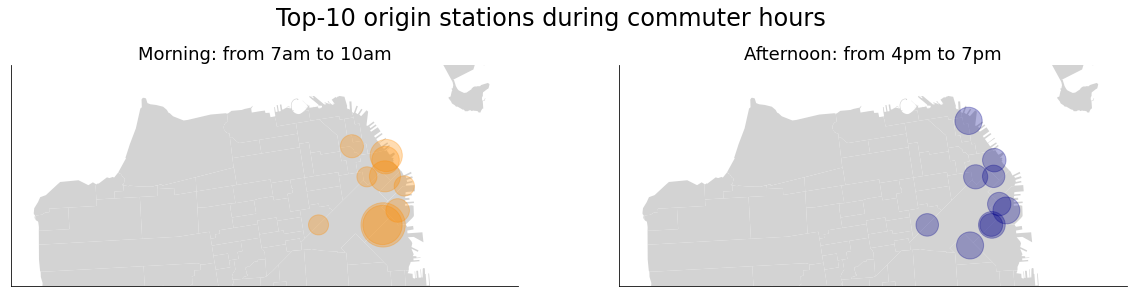

In [1017]:
sf = gpd.read_file("sf.shp")
sf.set_geometry("geometry")

morning_stations["geometry"] = morning_stations.apply(lambda row: Point(row["long"], row["lat"]), axis=1)
evening_stations["geometry"] = evening_stations.apply(lambda row: Point(row["long"], row["lat"]), axis=1)

data1 = gpd.GeoDataFrame(morning_stations, crs="epsg:4326", geometry="geometry")
data2 = gpd.GeoDataFrame(evening_stations, crs="epsg:4326", geometry="geometry")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,20))
fig.suptitle("Top-10 origin stations during commuter hours", fontsize=24, y=0.62)
ax1.set_title("Morning: from 7am to 10am", fontdict={'fontsize':18})
ax2.set_title("Afternoon: from 4pm to 7pm", fontdict={'fontsize':18})
sf_map1 = sf.plot(ax=ax1, color="lightgray")
sf_map2 = sf.plot(ax=ax2, color="lightgray")
data1.plot(ax=sf_map1, marker="o", markersize=data1["num_trips"]/20, color="darkorange", alpha=0.3)
data2.plot(ax=sf_map2, marker="o", markersize=data2["num_trips"]/20, color="darkblue", alpha=0.3)
plt.ylim(37.76, 37.82)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
plt.show()

### How is the availability of bikes in the most demanded origin stations during commuter hours? Do we have spare capacity to offer to new users?

The bicycle availability in the most demanded origin stations during commuter hours range from 33% to 54% in the morning, and from 37% to 62% in the evening. This indicates room for attraction of new users during commuter hours without jeopardizing quality of service for current users.

In [1018]:
%%bigquery bike_availability_morning
SELECT station_id AS origin_id, ROUND(AVG(bikes_available), 1) AS bikes_available,
ROUND(AVG(bikes_available) + AVG(docks_available), 0) AS dock_capacity,
ROUND(AVG(bikes_available)/(AVG(bikes_available) + AVG(docks_available))*100, 2) AS bike_availability
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE station_id IN (70, 69, 50, 55, 74, 61, 73, 54, 77, 67)
AND EXTRACT(HOUR FROM time) IN (7, 8, 9)
GROUP BY station_id
ORDER BY bike_availability DESC

In [1019]:
bike_availability_morning.set_index("origin_id", inplace=True)

In [1020]:
bike_availability_morning

,bikes_available,dock_capacity,bike_availability
origin_id,,,
69,12.3,23.0,53.77
74,12.0,22.0,53.39
77,13.3,26.0,50.30
50,11.5,23.0,50.09
54,7.5,15.0,49.87
73,7.6,15.0,49.66
61,12.3,26.0,46.66
70,8.4,19.0,44.41
55,9.6,23.0,41.80


In [1021]:
%%bigquery bike_availability_evening
SELECT station_id AS origin_id, ROUND(AVG(bikes_available), 1) AS bikes_available,
ROUND(AVG(bikes_available) + AVG(docks_available), 0) AS dock_capacity,
ROUND(AVG(bikes_available)/(AVG(bikes_available) + AVG(docks_available))*100, 2) AS bike_availability
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE station_id IN (60, 65, 61, 70, 77, 74, 64, 69, 67, 55)
AND EXTRACT(HOUR FROM time) IN (16, 17, 18)
GROUP BY station_id
ORDER BY bike_availability DESC

In [1022]:
bike_availability_evening.set_index("origin_id", inplace=True)

In [1023]:
bike_availability_evening

,bikes_available,dock_capacity,bike_availability
origin_id,,,
70,11.6,19.0,61.51
77,12.4,26.0,47.12
69,10.8,23.0,47.04
60,7.0,15.0,46.85
74,10.5,22.0,46.79
65,6.8,15.0,45.29
61,11.8,26.0,44.87
55,10.1,23.0,44.30
64,6.6,15.0,43.89


### Which stations are the most demanded ones as destination points during commuter hours?

The bar plots below present the 10 most demanded destination stations during the commuter hours. These are the most popular destination points in our system. We can see that overall the volume of trips is much more concentrated in some stations during the evening than during the morning.

In [1024]:
%%bigquery most_demanded_destinations_morning
SELECT MAX(end_station_id) AS dest_id, MAX(end_station_name) AS dest_name, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (7, 8, 9)
GROUP BY end_station_id
ORDER BY num_trips DESC
LIMIT 10

In [1025]:
%%bigquery most_demanded_destinations_evening
SELECT MAX(end_station_id) AS dest_id, MAX(end_station_name) AS dest_name, COUNT(trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) IN (16, 17, 18)
GROUP BY end_station_id
ORDER BY num_trips DESC
LIMIT 10

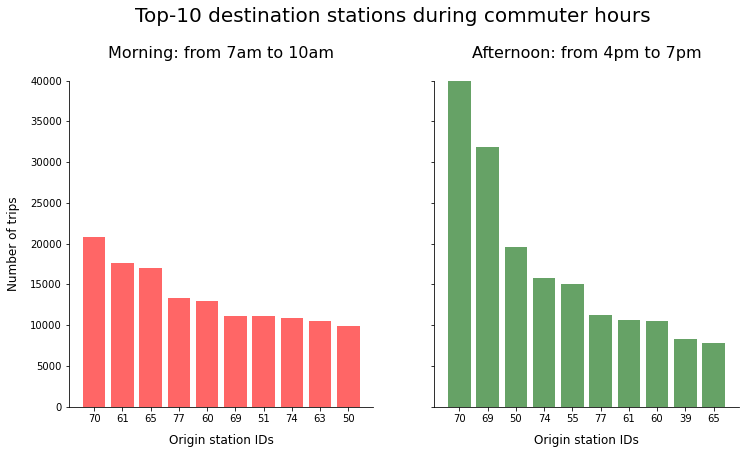

In [1026]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
fig.suptitle("Top-10 destination stations during commuter hours", fontsize=20, y=1.05)
ax1.bar(x=most_demanded_destinations_morning["dest_id"].astype(str), height=most_demanded_destinations_morning["num_trips"], color="red", alpha=0.6)
ax2.bar(x=most_demanded_destinations_evening["dest_id"].astype(str), height=most_demanded_destinations_evening["num_trips"], color="darkgreen", alpha=0.6)
ax1.set_title("Morning: from 7am to 10am", fontdict={'fontsize':16}, y=1.05)
ax2.set_title("Afternoon: from 4pm to 7pm", fontdict={'fontsize':16}, y=1.05)
ax1.set_ylabel("Number of trips", fontsize=12, labelpad=10)
ax1.set_xlabel("Origin station IDs", fontsize=12, labelpad=10)
ax2.set_xlabel("Origin station IDs", fontsize=12, labelpad=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.ylim(0, 40000)
plt.show()

### Where does our most demanded destination stations are located?

The maps below show the locations of our most demanded destination point stations during commuter hours.

In [1027]:
%%bigquery morning_destinations
SELECT trips.end_station_id AS station_id, MAX(stations.latitude) AS lat, MAX(stations.longitude) AS long, COUNT(trips.trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_stations` AS stations
INNER JOIN `bigquery-public-data.san_francisco.bikeshare_trips` AS trips ON stations.station_id=trips.end_station_id
WHERE trips.end_station_id in (70, 61, 65, 77, 60, 69, 51, 74, 63, 50) AND EXTRACT(HOUR FROM trips.start_date) IN (7, 8, 9)
GROUP BY trips.end_station_id
ORDER BY num_trips DESC
LIMIT 10

In [1028]:
%%bigquery evening_destinations
SELECT trips.end_station_id AS station_id, MAX(stations.latitude) AS lat, MAX(stations.longitude) AS long, COUNT(trips.trip_id) AS num_trips
FROM `bigquery-public-data.san_francisco.bikeshare_stations` AS stations
INNER JOIN `bigquery-public-data.san_francisco.bikeshare_trips` AS trips ON stations.station_id=trips.end_station_id
WHERE trips.end_station_id in (70, 69, 50, 74, 55, 77, 61, 60, 39, 65) AND EXTRACT(HOUR FROM trips.start_date) IN (16, 17, 18)
GROUP BY trips.end_station_id
ORDER BY num_trips DESC
LIMIT 10

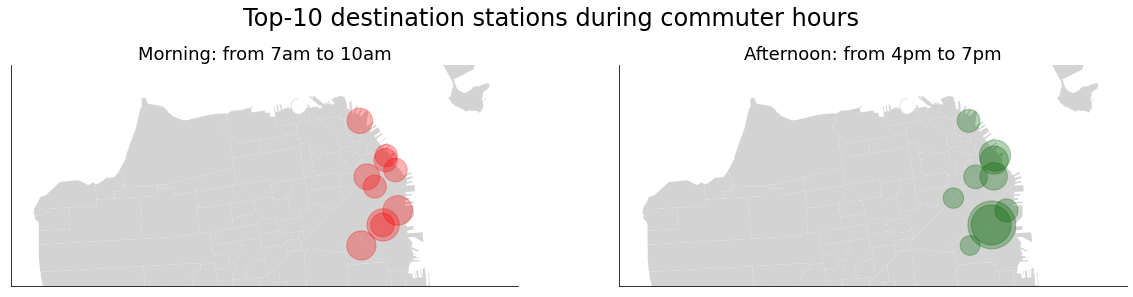

In [1029]:
sf = gpd.read_file("sf.shp")
sf.set_geometry("geometry")

morning_destinations["geometry"] = morning_destinations.apply(lambda row: Point(row["long"], row["lat"]), axis=1)
evening_destinations["geometry"] = evening_destinations.apply(lambda row: Point(row["long"], row["lat"]), axis=1)

data1 = gpd.GeoDataFrame(morning_destinations, crs="epsg:4326", geometry="geometry")
data2 = gpd.GeoDataFrame(evening_destinations, crs="epsg:4326", geometry="geometry")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,20))
fig.suptitle("Top-10 destination stations during commuter hours", fontsize=24, y=0.62)
ax1.set_title("Morning: from 7am to 10am", fontdict={'fontsize':18})
ax2.set_title("Afternoon: from 4pm to 7pm", fontdict={'fontsize':18})
sf_map1 = sf.plot(ax=ax1, color="lightgray")
sf_map2 = sf.plot(ax=ax2, color="lightgray")
data1.plot(ax=sf_map1, marker="o", markersize=data1["num_trips"]/20, color="red", alpha=0.3)
data2.plot(ax=sf_map2, marker="o", markersize=data2["num_trips"]/20, color="darkgreen", alpha=0.3)
plt.ylim(37.76, 37.82)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
plt.show()

### How is the availability of dockers in the most demanded destination stations during commuter hours? Do we have spare parking capacity to offer to new users?

Docker availability ranges from 46% to 57% on our most demanded destination stations in the morning, and from 38% to 56% in the evening. This suggests that there is no shortage of parking capacity neither in the morning or in the evening, reinforcing once more there is room for attracting more users during commuter hours without jeopardizing the quality of service for current users.

In [1030]:
%%bigquery docker_availability_morning
SELECT MAX(station_id) AS dest_id, ROUND(AVG(docks_available), 1) AS avg_docks_available,
ROUND(AVG(bikes_available) + AVG(docks_available), 0) AS dock_capacity,
ROUND(AVG(docks_available)/(AVG(bikes_available) + AVG(docks_available))*100, 2) AS dock_availability
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE station_id IN (70, 61, 65, 77, 60, 69, 51, 74, 63, 50) AND EXTRACT(HOUR FROM time) IN (7, 8, 9)
GROUP BY station_id
ORDER BY dock_availability DESC

In [1031]:
docker_availability_morning.set_index("dest_id", inplace=True)

In [1032]:
docker_availability_morning

,avg_docks_available,dock_capacity,dock_availability
dest_id,,,
51,10.8,19.0,56.78
60,8.4,15.0,55.89
70,10.5,19.0,55.59
63,10.5,19.0,55.27
61,14.1,26.0,53.34
65,7.9,15.0,52.58
50,11.4,23.0,49.91
77,13.1,26.0,49.70
74,10.4,22.0,46.61


In [1033]:
%%bigquery docker_availability_evening
SELECT MAX(station_id) AS dest_id, ROUND(AVG(docks_available), 1) AS avg_docks_available,
ROUND(AVG(bikes_available) + AVG(docks_available), 0) AS dock_capacity,
ROUND(AVG(docks_available)/(AVG(bikes_available) + AVG(docks_available))*100, 2) AS dock_availability
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE station_id IN (70, 69, 50, 74, 55, 77, 61, 60, 39, 65) AND EXTRACT(HOUR FROM time) IN (16, 17, 18)
GROUP BY station_id
ORDER BY dock_availability DESC

In [1034]:
docker_availability_evening.set_index("dest_id", inplace=True)

In [1035]:
docker_availability_evening

,avg_docks_available,dock_capacity,dock_availability
dest_id,,,
55,12.7,23.0,55.70
61,14.5,26.0,55.13
65,8.2,15.0,54.71
74,11.9,22.0,53.21
60,7.9,15.0,53.15
69,12.1,23.0,52.96
77,13.9,26.0,52.88
39,9.3,19.0,49.37
50,9.3,23.0,40.88


<a id='summary_findings'></a>
## 6-Summary of findings

From our analyses, we could learn that:
- Our business has been declining in the last months, making it imperative to attract new customers;
- Commuter hours are a very popular timing window for our service: from 7 to 10am in the morning, and from 4 to 7pm in the evening;
- Trip duration during commuter hours is almost half of that during the other service hours, and mix of subscribers is higher, suggesting commuter customers are very valuable to our company;
- The most demanded origin stations during commuter hours (either in the morning or in the evening) have enough bike availability to accomodate new users, without jeopardizing the quality of service for current users;
- The same applies for our most demanded destination stations during commuter hours (either in the morning or in the evening), which also have enough dock availability to accomodate new users;
- Given that, we will propose in the following chapter some new deals intended to maximize the use of our service during commuter hours, attracting new valuable customers and bringing additional revenue for our company.

<a id='recommendations'></a>
## 7-Recommendations

Based on the findings of this study we recommend a pilot of the following offerings intended to attract new commuter customers to our service:
- A **round trip** day option costing \\$2.50 a day; it allows you to pick a bike in one station, commute to another, and then came back later in the day to the same origin station; as the single ride option, it will cover the first 30 minutes of each ride, then it will charge an extra \\$3 per additional 15 minutes.
- A **commuter-only monthly membership** option - unlimited number of 30-minute rides valid within commuter hours only, then \\$3 per additional 15 minutes; it will be more affordable than the regular option, costing \\$9.90 per month. May be restricted for only a specific zone of origin-destination stations in the city.
- A **commuter-only annual membership option** - unlimited number of 30-minute rides within commuter hours only, then \\$3 per additional 15 minutes; it will be more affordable than the regular option, costing \\$99 per year. May be restricted for only a specific zone of origin-destination stations in the city.